# **Импортирование данных**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import datetime
import holidays

In [2]:
from google.colab import files
uploaded = files.upload()


Saving cpc.csv to cpc.csv


In [3]:
df= pd.read_csv("cpc.csv")

# **Анализ датасета до обработки**


In [4]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [6]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


# **Обработка датасета (работа с пропусками)**

In [7]:

missing_values = df.isnull().sum()

In [8]:

missing_percent = (missing_values / len(df)) * 100

In [9]:

missing_data = pd.DataFrame({"Пропуски": missing_values, "Процент": missing_percent})
missing_data = missing_data[missing_data["Пропуски"] > 0]
print(missing_data)

                      Пропуски   Процент
Location Description       965  0.402825
Ward                        10  0.004174
X Coordinate              4667  1.948171
Y Coordinate              4667  1.948171
Latitude                  4667  1.948171
Longitude                 4667  1.948171
Location                  4667  1.948171


In [10]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df.dropna(inplace=True)

Missing Values:
 ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234238 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234238 non-null  int64  
 1   Case Number           234238 non-null  object 
 2   Date                  234238 non-null  object 
 3   Block                 234238 non-null  object 
 4   IUCR                  234238 non-null  object 
 5   Primary Type          234238 non-null  object 
 6   Description           234238 non-null  object 
 7   Location Description  234238 non-null  object 
 8   Arrest                234238 non-null  bool   
 9   Domestic              234238 non-null  bool   
 10  Beat                  234238 non-null  int64  
 11  District              234238 non-null  int64  
 12  Ward                  234238 non-null  float64
 13  Community Area        234238 non-null  int64  
 14  FBI Code              234238 non-null  object 
 15  X Coo

In [12]:
import numpy as np
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column].dropna(), 25)
    Q3 = np.percentile(data[column].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
numeric_columns = ["Beat", "District", "Ward", "Community Area", "X Coordinate", "Y Coordinate", "Latitude", "Longitude", "Year"]

for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Выбросов в {col}: {len(outliers)}")


Выбросов в Beat: 0
Выбросов в District: 0
Выбросов в Ward: 0
Выбросов в Community Area: 0
Выбросов в X Coordinate: 1710
Выбросов в Y Coordinate: 2
Выбросов в Latitude: 2
Выбросов в Longitude: 1711
Выбросов в Year: 0


In [13]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,53621
BATTERY,40800
CRIMINAL DAMAGE,27028
MOTOR VEHICLE THEFT,21386
ASSAULT,20737
DECEPTIVE PRACTICE,14737
OTHER OFFENSE,14369
ROBBERY,8952
WEAPONS VIOLATION,8709


# **Построение матрицы корреляций для числовых переменных**



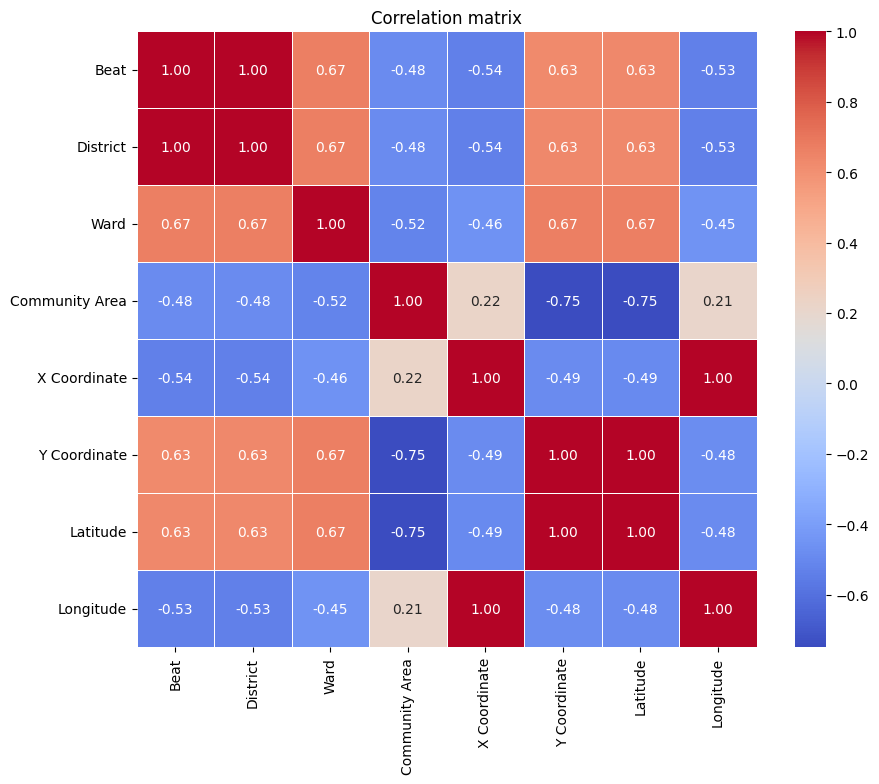

In [15]:
numeric_columns = ['Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate','Latitude', 'Longitude']
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

Матрица корреляции демонстрирует взаимосвязи между административными единицами, такими как Beat, District и Ward, которые имеют высокие положительные корреляции (1.00 и 0.67), указывая на их тесную связь. Community Area показывает отрицательные корреляции с большинством параметров, что может свидетельствовать о противоположных тенденциях в распределении данных.

**EDA**


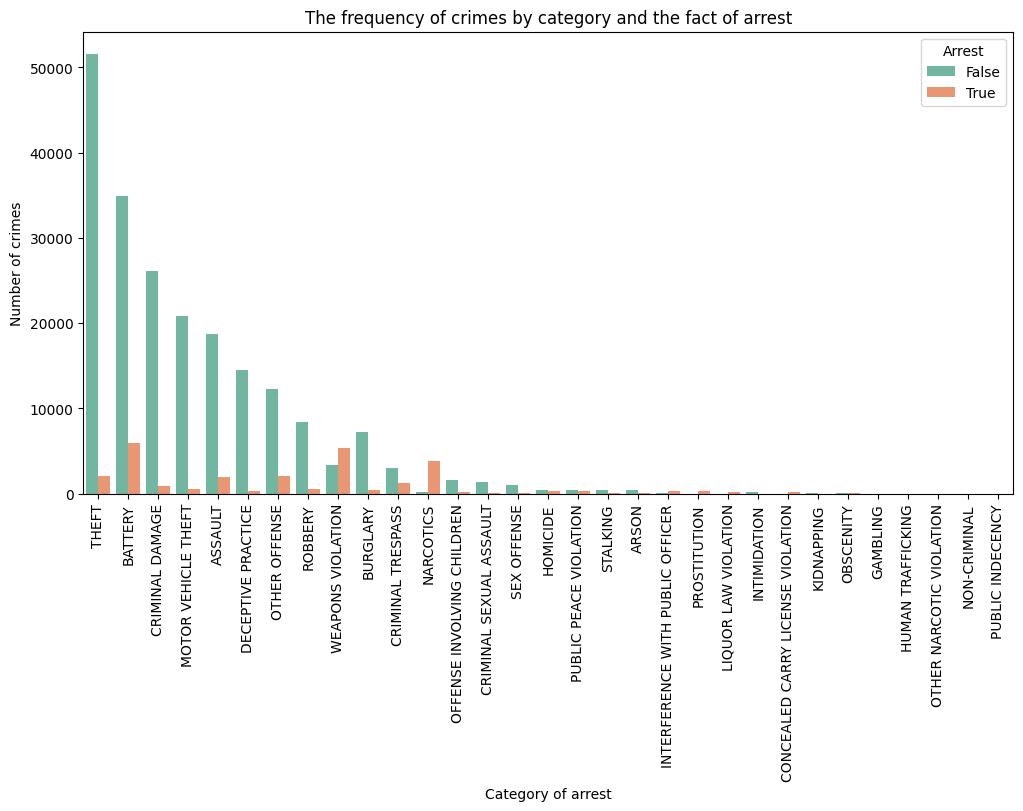

In [17]:
crime_counts = df['Primary Type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary Type', hue='Arrest', palette='Set2', order=crime_counts.index)
plt.title('The frequency of crimes by category and the fact of arrest')
plt.xlabel('Category of arrest')
plt.ylabel('Number of crimes')
plt.xticks(rotation=90)
plt.show()

График показывает, что наиболее частыми категориями преступлений являются **THEFT**, **BATTERY** и **CRIMINAL DAMAGE**, тогда как такие преступления, как **HOMICIDE** и **HUMAN TRAFFICKING**, встречаются значительно реже. Также видно, что в большинстве случаев аресты (**Arrest: True**) происходят реже, чем отсутствие арестов (**Arrest: False**), что может указывать на сложности в задержании преступников или недостаточность доказательств.

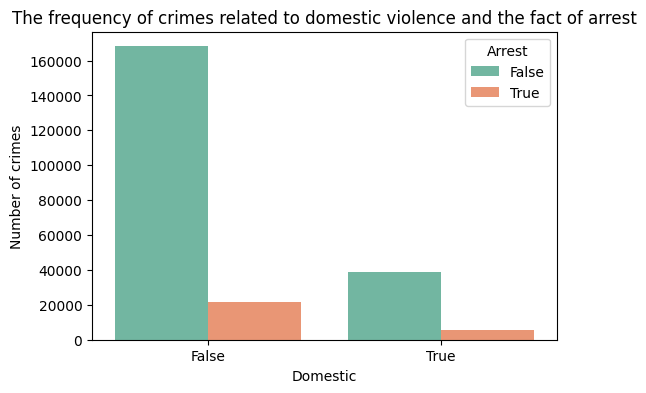

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Domestic', hue='Arrest', palette='Set2')
plt.title('The frequency of crimes related to domestic violence and the fact of arrest')
plt.ylabel('Number of crimes')
plt.show()

График показывает, что большинство преступлений, связанных с домашним насилием (**Domestic**), не сопровождаются арестами (**Arrest: False**).


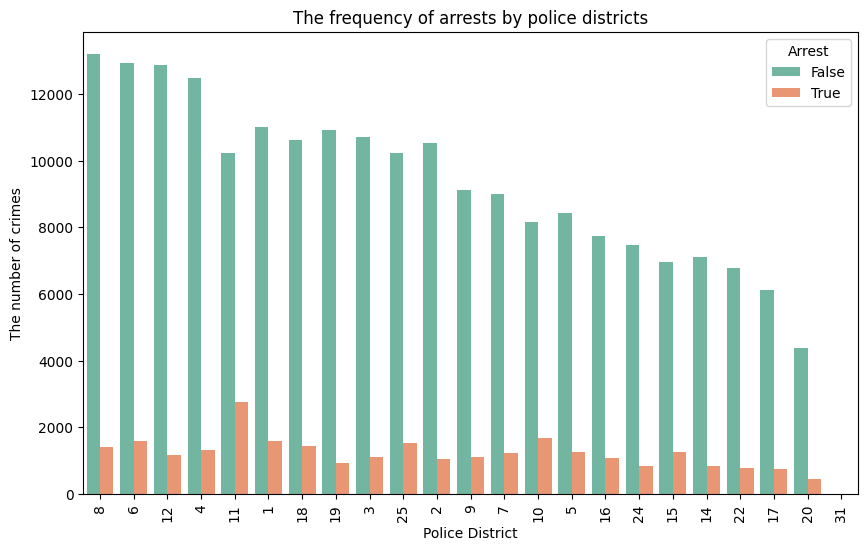

In [20]:
district_counts = df['District'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='District', hue='Arrest', palette='Set2', order=district_counts.index)
plt.title('The frequency of arrests by police districts')
plt.xlabel('Police District')
plt.ylabel('The number of crimes')
plt.xticks(rotation=90)
plt.show()

График демонстрирует, что количество арестов (Arrest: True) варьируется в зависимости от полицейского округа, причем в некоторых округах, таких как 8 и 6, наблюдается значительно больше арестов, чем в других.

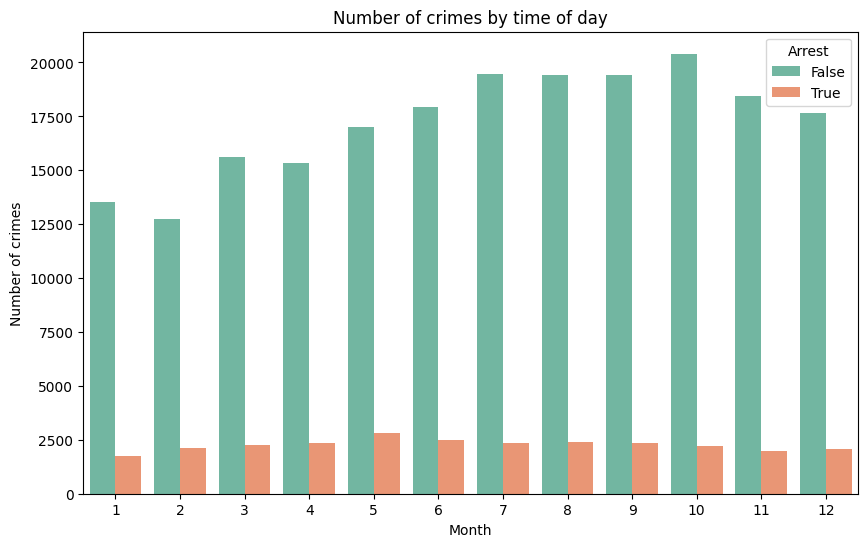

In [24]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Arrest', palette='Set2')
plt.title('Number of crimes by time of day')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.show()


Аресты (Arrest: True) происходят реже, чем случаи без арестов (Arrest: False), что может свидетельствовать о сезонных изменениях в преступности и возможных сложностях в задержании преступников.

<ipython-input-28-98b0ec5bd150>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time_of_Day', palette='Set2', order=['Morning', 'Day', 'Evening', 'Night'])


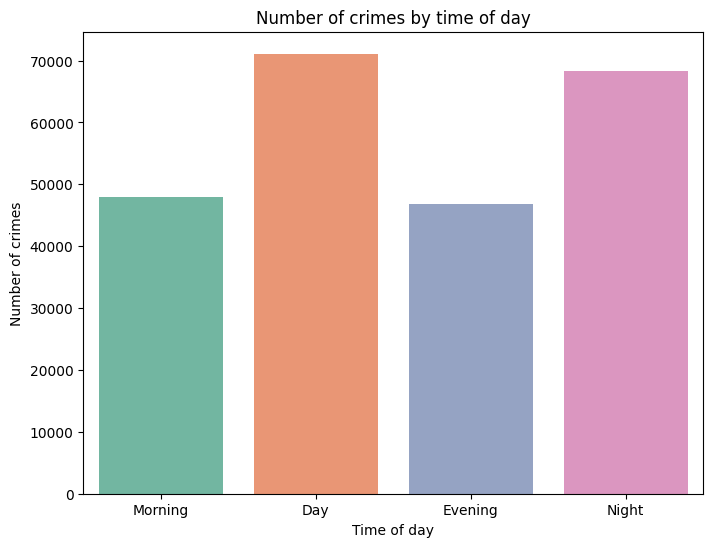

In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # Утро
    elif 12 <= hour < 18:
        return 'Day'  # День
    elif 18 <= hour < 22:
        return 'Evening'  # Вечер
    else:
        return 'Night'  # Ночь

df['Time_of_Day'] = df['Hour'].apply(time_of_day)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_of_Day', palette='Set2', order=['Morning', 'Day', 'Evening', 'Night'])
plt.title('Number of crimes by time of day')
plt.xlabel('Time of day')
plt.ylabel('Number of crimes')
plt.show()




<ipython-input-34-0b42ce2b30ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette=custom_palette)


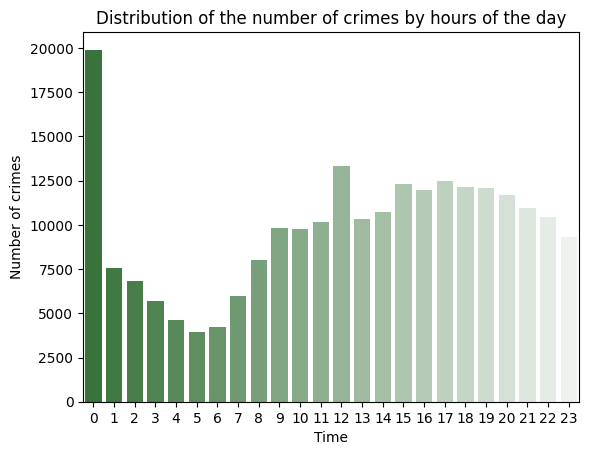

In [34]:
custom_palette = sns.light_palette("#2e7d32", reverse=True, n_colors=24)

sns.countplot(data=df, x='Hour', palette=custom_palette)
plt.title('Distribution of the number of crimes by hours of the day')
plt.xlabel('Time')
plt.ylabel('Number of crimes')
plt.xticks(range(0, 24))
plt.show()

График демонстрирует, что количество преступлений значительно увеличивается в вечерние и ночные часы, достигая пика в позднее время.

<ipython-input-36-e7d4a01c8800>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


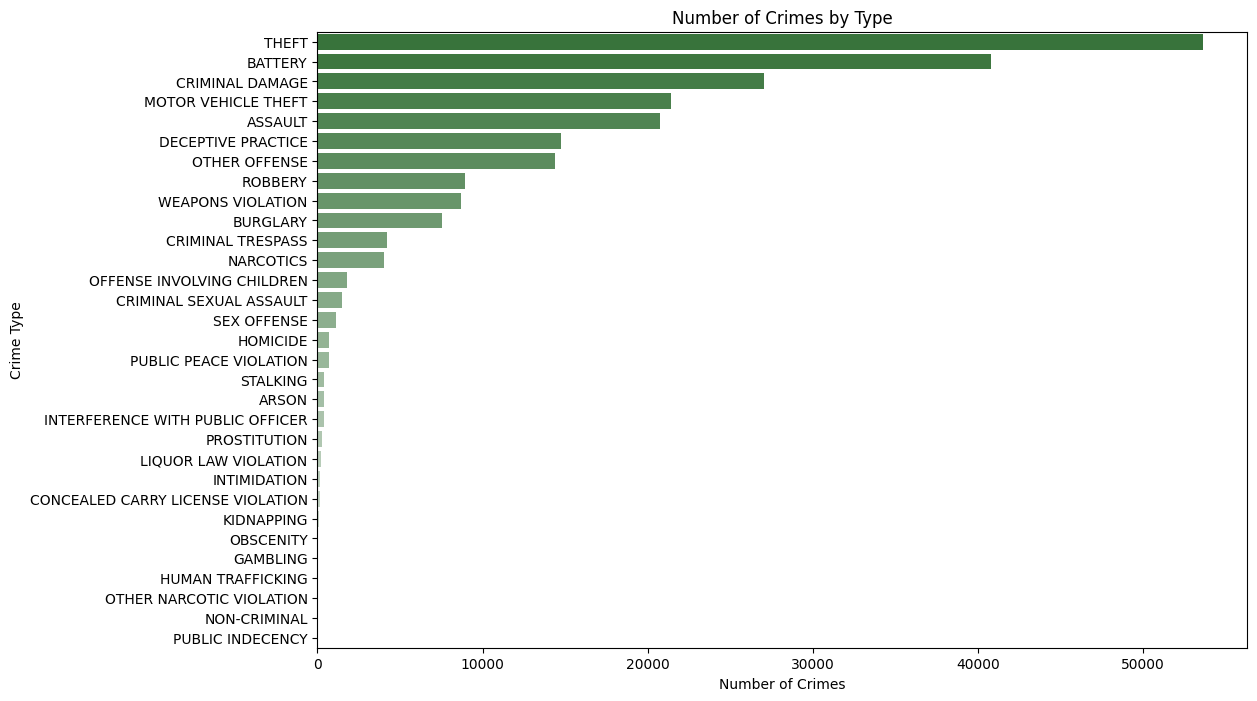

In [36]:
custom_palette = sns.light_palette("#2e7d32", reverse=True, n_colors=len(df['Primary Type'].unique()))

plt.figure(figsize=(12, 8))
sns.countplot(
    data=df,
    y='Primary Type',
    palette=custom_palette,
    order=df['Primary Type'].value_counts().index
)

plt.title('Number of Crimes by Type')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

График показывает распределение количества преступлений по их типам, где THEFT, BATTERY и CRIMINAL DAMAGE являются наиболее распространенными. Наименее частыми преступлениями являются HOMICIDE, HUMAN TRAFFICKING и PUBLIC INDECENCY, что отражает общую структуру преступности.

<ipython-input-37-59f7a6f290a5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-37-59f7a6f290a5>:7: UserWarning: The palette list has more values (31) than needed (30), which may not be intended.
  sns.countplot(


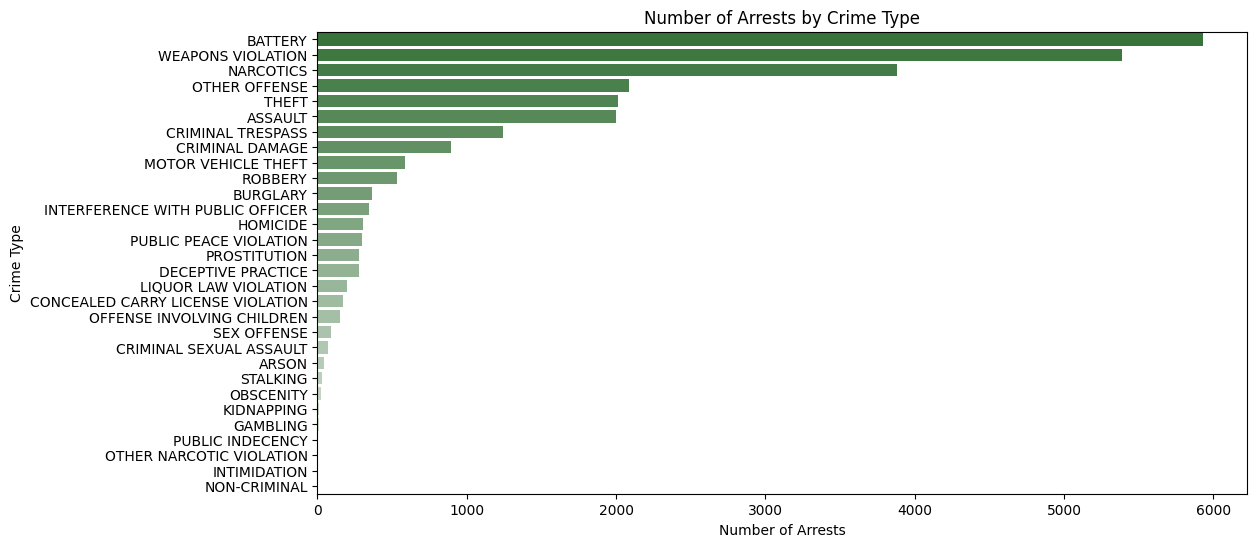

In [37]:
custom_palette = sns.light_palette("#2e7d32", reverse=True, n_colors=len(df['Primary Type'].unique()))

arrest_counts = df[df['Arrest'] == True]['Primary Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df[df['Arrest'] == True],
    y='Primary Type',
    palette=custom_palette,
    order=arrest_counts.index
)

plt.title('Number of Arrests by Crime Type')
plt.xlabel('Number of Arrests')
plt.ylabel('Crime Type')
plt.show()


График отображает количество арестов по типам преступлений, где видно, что такие категории, как INTERFERENCE WITH PUBLIC OFFICER и PUBLIC PEACE VIOLATION, имеют значительное количество арестов.

<ipython-input-39-450f6f704cbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


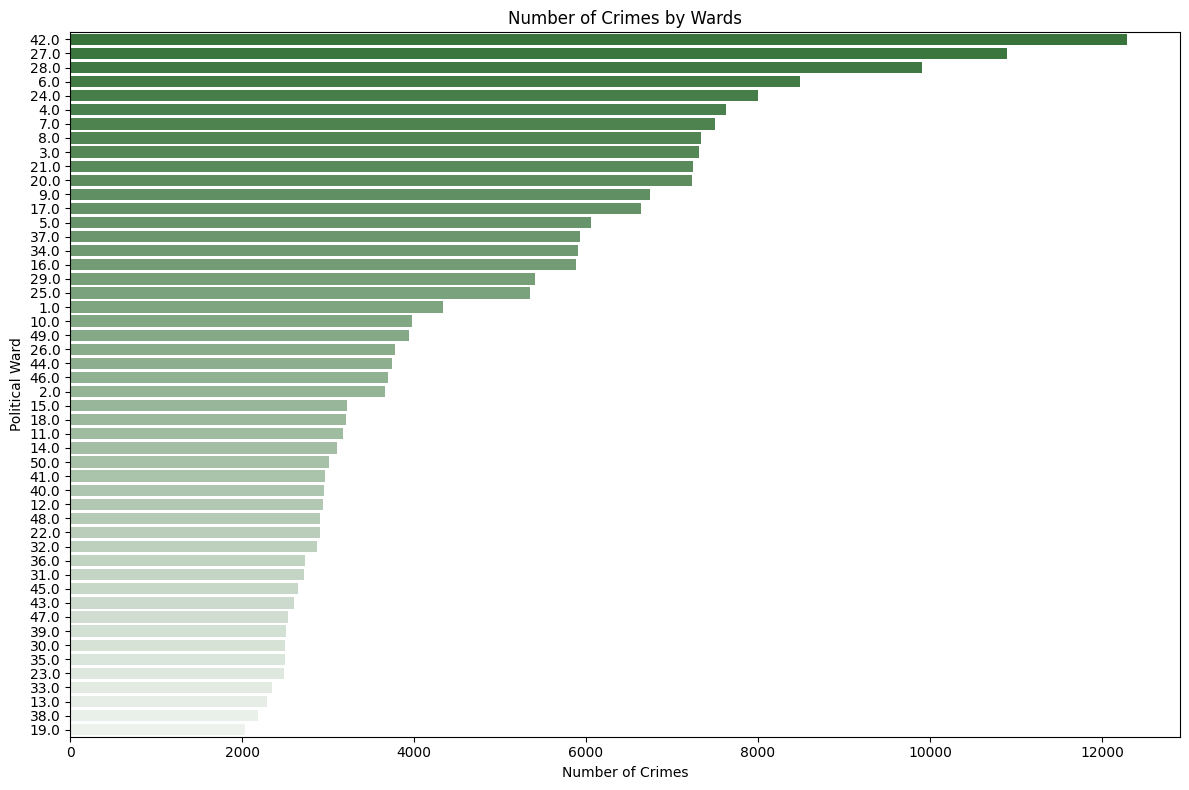

In [39]:

custom_palette = sns.light_palette("#2e7d32", reverse=True, n_colors=len(df['Ward'].unique()))

plt.figure(figsize=(12, 8))
sns.countplot(
    data=df,
    y='Ward',
    palette=custom_palette,
    order=df['Ward'].value_counts().index
)

plt.title('Number of Crimes by Wards')
plt.xlabel('Number of Crimes')
plt.ylabel('Political Ward')
plt.tight_layout()
plt.show()

График показывает количество преступлений по политическим округам, где каждый округ обозначен числом. Наиболее высокие показатели преступлений наблюдаются в округах с номерами 42, 27 и 28, что может быть связано с более высокой плотностью населения, социально-экономическими проблемами или другими местными факторами.

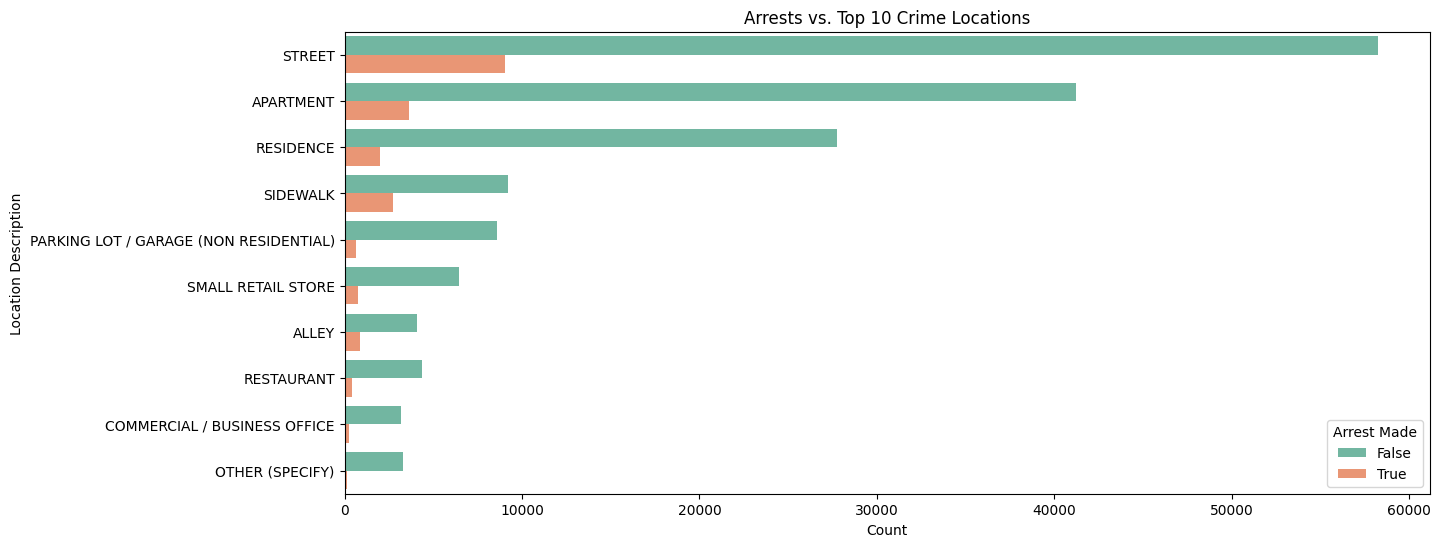

In [41]:

copy_df = df.copy()
if "location_group" not in copy_df.columns:
    copy_df["location_group"] = copy_df["Location Description"]


top_locations = copy_df["location_group"].value_counts().head(10).index.tolist()
filtered_df = copy_df[copy_df["location_group"].isin(top_locations)]


plt.figure(figsize=(14, 6))
sns.countplot(
    data=filtered_df,
    y="location_group",
    hue="Arrest",
    order=top_locations,
    palette="Set2"
)

plt.title("Arrests vs. Top 10 Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location Description")
plt.legend(title="Arrest Made")
plt.show()


Наиболее частыми местами преступлений являются улицы (STREET) и жилые помещения (RESIDENCE), что может быть связано с их доступностью и высокой проходимостью. Аресты чаще происходят в местах с большим количеством преступлений, таких как улицы и тротуары, что указывает на активное патрулирование и контроль в этих зонах.